In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from xhistogram.xarray import histogram
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.path as mpath

In [2]:
locinit = "Drake"
timedir = "back"
runtime = 30*365 # days

fileout = ("output"
           +".locinit_"+locinit
           +".timedir_"+timedir
           +".ntime_"+str(runtime)+".nc")

ds = xr.open_dataset(fileout)

### Pathway count

In [3]:
res = 2
lonG = np.arange(0,360,res)
latG = np.arange(-75,-45,res)

In [6]:
hs = histogram(ds['lon'],ds['lat'],bins=[lonG,latG],block_size=1)
hs = hs.where((hs!=0))#&(hs<1e6))

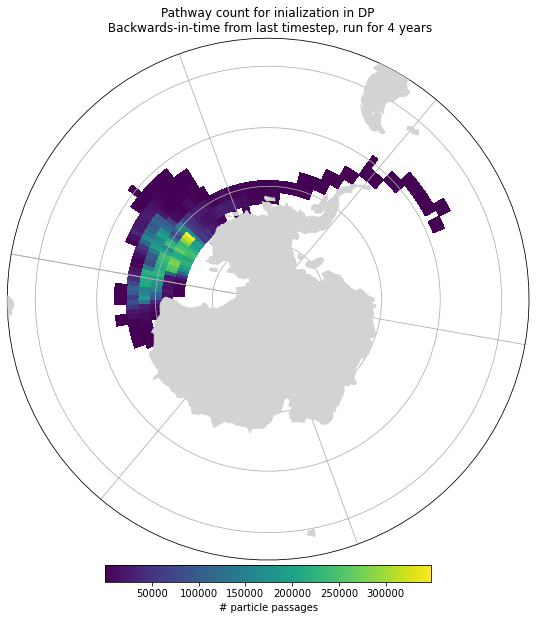

In [7]:
fig,ax = plt.subplots(figsize=(20,10),
                      subplot_kw={'projection':
                                      ccrs.SouthPolarStereo(
                                      central_longitude=-100)})

ax.set_extent([-180, 180, -90, -45], ccrs.PlateCarree())
# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

im=ax.pcolormesh(hs['lon_bin'],hs['lat_bin'],hs.transpose(),
              transform=ccrs.PlateCarree())
plt.colorbar(im,ax=ax,
             orientation='horizontal',
            fraction=0.03,pad=0.01,
            label='# particle passages')

ax.add_feature(cfeature.LAND, zorder=10,facecolor='lightgray')
ax.gridlines()
ax.set_title(
    'Pathway count for inialization in DP\n Backwards-in-time from last timestep, run for 4 years');

### Depth distribution

In [10]:
hs_depth = histogram(ds['lon'],ds['lat'],bins=[lonG,latG],weights=ds['z'],block_size=1)
depth = hs_depth/hs

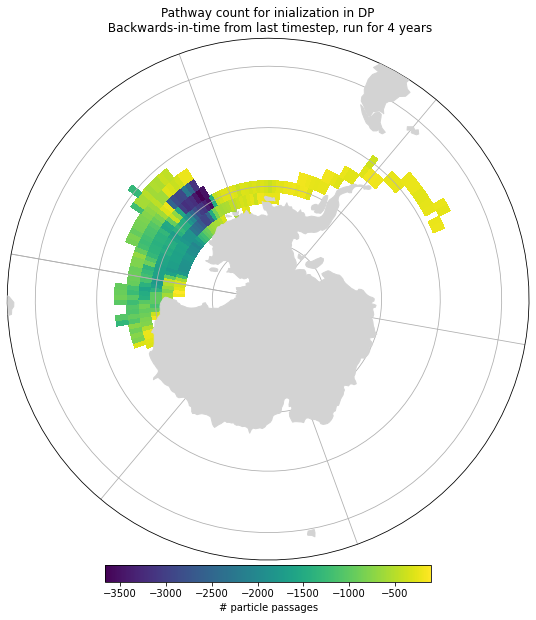

In [15]:
fig,ax = plt.subplots(figsize=(20,10),
                      subplot_kw={'projection':
                                      ccrs.SouthPolarStereo(
                                      central_longitude=-100)})

ax.set_extent([-180, 180, -90, -45], ccrs.PlateCarree())
# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

im=ax.pcolormesh(depth['lon_bin'],depth['lat_bin'],depth.transpose(),
              transform=ccrs.PlateCarree())
plt.colorbar(im,ax=ax,
             orientation='horizontal',
            fraction=0.03,pad=0.01,
            label='# particle passages')

ax.add_feature(cfeature.LAND, zorder=10,facecolor='lightgray')
ax.gridlines()
ax.set_title(
    'Pathway count for inialization in DP\n Backwards-in-time from last timestep, run for 4 years');

In [14]:
ds['z'].values

array([[ -100.      ,  -122.105934,  -138.03958 , ...,  -125.22758 ,
         -135.60732 ,  -141.69148 ],
       [ -159.18367 ,  -163.90437 ,  -160.60454 , ...,          nan,
                 nan,          nan],
       [ -218.36734 ,  -219.26753 ,  -217.03621 , ...,  -244.6839  ,
         -203.74678 ,  -212.71959 ],
       ...,
       [-2881.6326  , -2908.8628  , -2894.9453  , ..., -3486.775   ,
        -3445.436   , -3480.3818  ],
       [-2940.8164  , -2963.5938  , -2948.7976  , ..., -3072.985   ,
        -3084.5095  , -3147.7004  ],
       [-3000.      , -3019.165   , -3005.163   , ..., -3330.2083  ,
        -3308.776   , -3301.553   ]], dtype=float32)